In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc


Using TensorFlow backend.


In [2]:
##creat a dataframe for both train and test set from the given train and test csv
##Sample the train and test set to reduce the timing  

train_df = pd.read_csv('C:\\Users\\Huda\Desktop\\fashionmnist (1)\\fashion-mnist_train.csv')
test_df=pd.read_csv('C:\\Users\\Huda\Desktop\\fashionmnist (1)\\fashion-mnist_test.csv')

train_reduced=train_df.sample(frac=0.10,replace=False,random_state=1)
test_reduced=test_df.sample(frac=0.10,replace=False,random_state=1)
train_reduced.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15281,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47529,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# split the training and testing data into X (image) and Y (label) arrays
#Since the image data in x_train and x_test is from 0 to 255 ,
#we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255


train_data = np.array(train_reduced, dtype='float32')
test_data = np.array(test_reduced, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

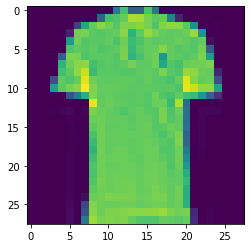

In [10]:
# lets see what the images look like

image = x_train[50, :].reshape((28, 28))
plt.imshow(image)
plt.show()

0.8183502579182788
0.831
[[70  1  2  5  0  0 13  0  1  0]
 [ 0 85  0  2  0  0  0  0  0  0]
 [ 2  0 96  1 12  1 12  0  0  0]
 [ 2  3  0 97  5  0  5  0  0  0]
 [ 1  1 11  4 85  0  9  0  1  0]
 [ 0  0  0  0  0 87  0  7  0  4]
 [15  0 13  5  9  0 55  0  1  0]
 [ 0  0  0  0  0  2  0 88  0  1]
 [ 2  0  1  1  1  1  6  1 87  0]
 [ 0  0  0  0  0  0  0  5  0 81]]
Parameters: [[-5.20112074e-03  1.01381831e-02  6.11688521e-03 ... -1.68206028e-01
  -6.81901478e-02 -2.68551728e-03]
 [-3.09616152e-05 -1.43982702e-04 -3.48371169e-03 ... -3.57471268e-02
  -1.22670299e-02 -2.57436828e-03]
 [-8.88060003e-06  1.62123488e-02  1.82986136e-01 ...  2.77068200e-01
   4.86527199e-01  5.24967107e-02]
 ...
 [-1.25382722e-09 -3.97057294e-07 -1.01317039e-05 ... -3.23875735e-02
  -1.95315559e-02 -9.70635402e-06]
 [-7.01290243e-04 -1.51577938e-03 -2.59932489e-02 ... -1.82916442e-01
  -1.15566521e-01 -1.47628592e-02]
 [-4.18658860e-07 -3.21746227e-04 -8.12022648e-03 ... -3.53959576e-01
  -1.68973397e-01 -6.34245095e-0

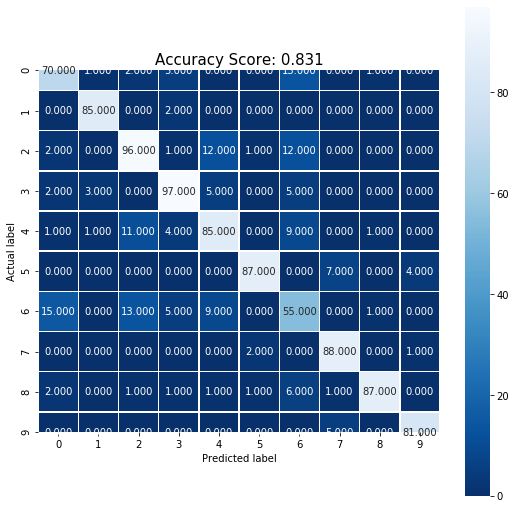

In [11]:
## # # # # # # # # # # # # # # # # LOGISTIC REGRESSION # # # # # # # # # # # # # # # # # # # # # # # 

# Fitting Logistic Regression to the Training set
# 3 fold Cross Validation on x_train and y_train

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

print(cross_val_score(classifier, x_train, y_train,cv=3,scoring="accuracy").mean())

# Predicting the Test set results
y_pred = classifier.predict(x_test)
acc_lg = accuracy_score(y_test, y_pred)
print(acc_lg)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_lg)
plt.title(all_sample_title, size = 15);
print(cm)

parameters = classifier.coef_

print("Parameters:", parameters)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        92
         1.0       0.94      0.98      0.96        87
         2.0       0.78      0.77      0.78       124
         3.0       0.84      0.87      0.85       112
         4.0       0.76      0.76      0.76       112
         5.0       0.96      0.89      0.92        98
         6.0       0.55      0.56      0.56        98
         7.0       0.87      0.97      0.92        91
         8.0       0.97      0.87      0.92       100
         9.0       0.94      0.94      0.94        86

    accuracy                           0.83      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.83      0.83      0.83      1000



In [13]:
## DECISION TREES
###Grid Search to find best model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid={"min_samples_split":[2,3,4],"max_depth":[2,4,10]}
tree=DecisionTreeClassifier()

grid_tree=GridSearchCV(tree,param_grid,cv=5,scoring="accuracy")
grid_tree.fit(x_train,y_train)
tree_preds=grid_tree.predict_proba(x_test)[:,1]
best_acc=grid_tree.best_score_
print(best_acc)

best_parameters=grid_tree.best_params_
print(best_parameters)

0.7552083333333334
{'max_depth': 10, 'min_samples_split': 3}


0.751
[[63  1  5  3  5  0 13  1  0  1]
 [ 1 83  0  3  0  0  0  0  0  0]
 [ 3  0 86  2 24  0  9  0  0  0]
 [ 7  6  0 88  6  0  3  0  2  0]
 [ 1  1 12  6 83  1  7  0  1  0]
 [ 0  1  0  2  2 79  1  9  0  4]
 [15  0 16  7 15  0 43  0  2  0]
 [ 0  0  0  0  0  4  0 78  0  9]
 [ 2  0  6  0  5  3  6  2 76  0]
 [ 0  0  1  0  0  6  0  5  2 72]]
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        92
         1.0       0.90      0.95      0.93        87
         2.0       0.68      0.69      0.69       124
         3.0       0.79      0.79      0.79       112
         4.0       0.59      0.74      0.66       112
         5.0       0.85      0.81      0.83        98
         6.0       0.52      0.44      0.48        98
         7.0       0.82      0.86      0.84        91
         8.0       0.92      0.76      0.83       100
         9.0       0.84      0.84      0.84        86

    accuracy                           0.75      1000
   macro avg 

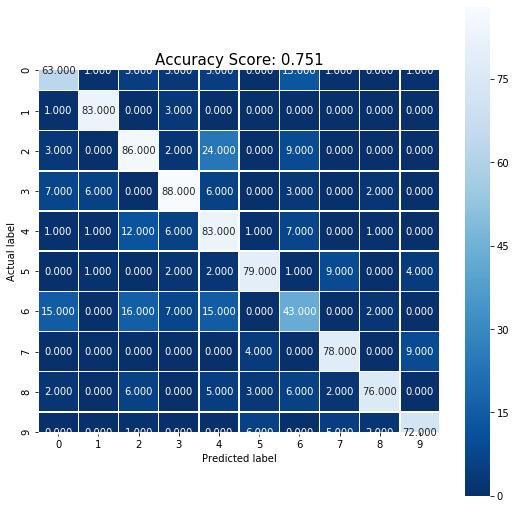

In [14]:
# calculate test accuracy
# print confusion matrix


classifier=DecisionTreeClassifier(max_depth= 10, min_samples_split= 3)
classifier.fit(x_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_dt = accuracy_score(y_test, y_pred)
print(acc_dt)
print(cm)

### plot the Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_dt)
plt.title(all_sample_title, size = 15);

print(classification_report(y_test, y_pred))

0.832
[[ 76   0   2   7   1   0   4   0   2   0]
 [  0  84   1   1   0   0   1   0   0   0]
 [  2   0  95   0  15   0  12   0   0   0]
 [  3   1   0 101   5   0   1   0   1   0]
 [  1   0  12   4  88   0   6   0   1   0]
 [  0   0   0   0   0  89   0   6   0   3]
 [ 21   2  13   5   9   0  47   0   1   0]
 [  0   0   0   0   0   4   0  80   0   7]
 [  0   3   1   1   1   1   1   1  91   0]
 [  0   0   0   0   0   2   0   3   0  81]]
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78        92
         1.0       0.93      0.97      0.95        87
         2.0       0.77      0.77      0.77       124
         3.0       0.85      0.90      0.87       112
         4.0       0.74      0.79      0.76       112
         5.0       0.93      0.91      0.92        98
         6.0       0.65      0.48      0.55        98
         7.0       0.89      0.88      0.88        91
         8.0       0.95      0.91      0.93       100
         9.0       0.8

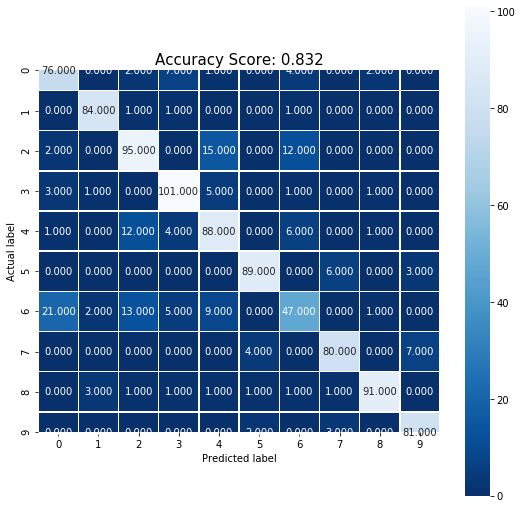

In [15]:
############################# Random Forest #########################################
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Checking the Accuracy Score Matrix
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)
print(cm)

# Plot the Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_rf)
plt.title(all_sample_title, size = 15);

print(classification_report(y_test, y_pred))

0.572
[[ 56   2   2  15   7   0   5   0   5   0]
 [  0  81   1   5   0   0   0   0   0   0]
 [  2   1  21  12  84   0   2   0   2   0]
 [  1   4   0 105   1   0   1   0   0   0]
 [  0   2   2  24  80   0   1   0   3   0]
 [  0   0   0   0   0  13   1  71   2  11]
 [ 13   4   6  25  43   0   3   0   4   0]
 [  0   0   0   0   0   0   0  89   0   2]
 [  1   1   1   5  16   1   4   1  70   0]
 [  0   0   0   0   0   1   0  30   1  54]]
              precision    recall  f1-score   support

         0.0       0.77      0.61      0.68        92
         1.0       0.85      0.93      0.89        87
         2.0       0.64      0.17      0.27       124
         3.0       0.55      0.94      0.69       112
         4.0       0.35      0.71      0.47       112
         5.0       0.87      0.13      0.23        98
         6.0       0.18      0.03      0.05        98
         7.0       0.47      0.98      0.63        91
         8.0       0.80      0.70      0.75       100
         9.0       0.8

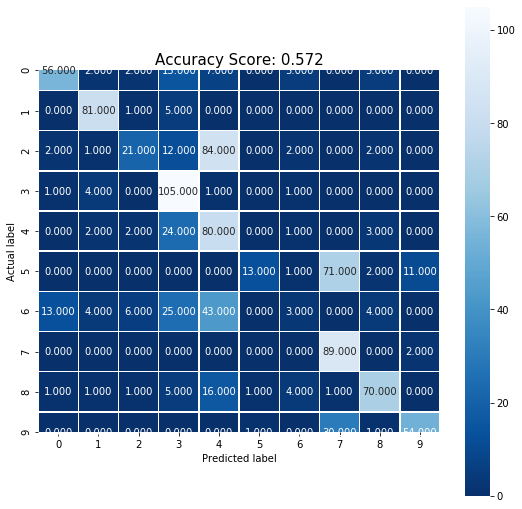

In [16]:
############################################## Naive Bayes #######################################

#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Checking the Accuracy Score Matrix
acc_nb = accuracy_score(y_test, y_pred)
print(acc_nb)
print(cm)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_nb)
plt.title(all_sample_title, size = 15);

print(classification_report(y_test, y_pred))


In [17]:
from time import time
from sklearn.neighbors import KNeighborsClassifier


params = {"n_neighbors":[1, 3, 5, 7], "metric":["euclidean", "manhattan", "chebyshev"]}
acc = {}
i=0

for m in params["metric"]:
    acc[m] = []
    for k in params["n_neighbors"]:
        print("Model_{} metric: {}, n_neighbors: {}".format(i, m, k))
        i += 1
        t = time()
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(x_train, y_train)
        pred = knn.predict(x_test)
        print("Time: ", time() - t)
        acc[m].append(accuracy_score(y_test, y_pred))
        print("Acc: ", acc[m][-1])

Model_0 metric: euclidean, n_neighbors: 1
Time:  7.244656562805176
Acc:  0.572
Model_1 metric: euclidean, n_neighbors: 3
Time:  7.3651282787323
Acc:  0.572
Model_2 metric: euclidean, n_neighbors: 5
Time:  7.399651765823364
Acc:  0.572
Model_3 metric: euclidean, n_neighbors: 7
Time:  7.608104467391968
Acc:  0.572
Model_4 metric: manhattan, n_neighbors: 1
Time:  6.156856298446655
Acc:  0.572
Model_5 metric: manhattan, n_neighbors: 3
Time:  6.302810430526733
Acc:  0.572
Model_6 metric: manhattan, n_neighbors: 5
Time:  6.411331415176392
Acc:  0.572
Model_7 metric: manhattan, n_neighbors: 7
Time:  6.273320198059082
Acc:  0.572
Model_8 metric: chebyshev, n_neighbors: 1
Time:  2.9621589183807373
Acc:  0.572
Model_9 metric: chebyshev, n_neighbors: 3
Time:  3.4318325519561768
Acc:  0.572
Model_10 metric: chebyshev, n_neighbors: 5
Time:  3.3859078884124756
Acc:  0.572
Model_11 metric: chebyshev, n_neighbors: 7
Time:  3.450246572494507
Acc:  0.572


In [18]:
####Create the Convolutional Neural Networks (CNN)¶
####1st define the model, then compile it and then fit the model


im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (4800, 28, 28, 1)
x_test shape: (1000, 28, 28, 1)
x_validate shape: (1200, 28, 28, 1)


In [19]:
#### Part 1- Define the model


# Step 1 - Convolution
# Initialising the CNN
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
# Step 2 - Pooling
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
# Step 3 - Flattening
    Flatten(),
# Step 4 - Full connection
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])



In [20]:
# Part 2-Compiling the CNN
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [21]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    
)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 2s 494us/step - loss: 1.8839 - accuracy: 0.4094 - val_loss: 1.3528 - val_accuracy: 0.5367
Epoch 2/10
4800/4800 [==============================] - 2s 334us/step - loss: 1.0868 - accuracy: 0.6467 - val_loss: 0.8539 - val_accuracy: 0.7400
Epoch 3/10
4800/4800 [==============================] - 2s 336us/step - loss: 0.7543 - accuracy: 0.7460 - val_loss: 0.6883 - val_accuracy: 0.7508
Epoch 4/10
4800/4800 [==============================] - 2s 349us/step - loss: 0.6376 - accuracy: 0.7781 - val_loss: 0.6230 - val_accuracy: 0.7800
Epoch 5/10
4800/4800 [==============================] - 2s 346us/step - loss: 0.5794 - accuracy: 0.7977 - val_loss: 0.5797 - val_accuracy: 0.7975
Epoch 6/10
4800/4800 [==============================] - 2s 339us/step - loss: 0.5390 - accuracy: 0.8104 - val_loss: 0.5415 - val_accuracy: 0.8100
Epoch 7/10
4800/4800 [==============================] - 2s 339us/step - loss

0.8500000238418579
[[ 56   2   2  15   7   0   5   0   5   0]
 [  0  81   1   5   0   0   0   0   0   0]
 [  2   1  21  12  84   0   2   0   2   0]
 [  1   4   0 105   1   0   1   0   0   0]
 [  0   2   2  24  80   0   1   0   3   0]
 [  0   0   0   0   0  13   1  71   2  11]
 [ 13   4   6  25  43   0   3   0   4   0]
 [  0   0   0   0   0   0   0  89   0   2]
 [  1   1   1   5  16   1   4   1  70   0]
 [  0   0   0   0   0   1   0  30   1  54]]


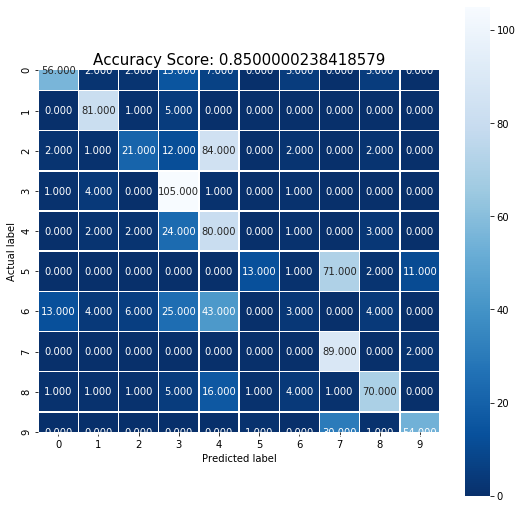

In [22]:
#### Evaluate /Score the model
score = cnn_model.evaluate(x_test, y_test, verbose=0)

acc_cnn=score[1]

print(acc_cnn)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_cnn)
plt.title(all_sample_title, size = 15);





In [23]:
#### Show the acuraccy for all the models

model_list=["Log Reg","Dec Tree", "Ran Forest",  "Naive Bais",  "CNN", ]
accuracy_list = [acc_lg,acc_dt,acc_rf,acc_nb,acc_cnn]

scores_df = pd.DataFrame()

scores_df["Accuracy"]=accuracy_list
scores_df["Accuracy"]=scores_df["Accuracy"]
scores_df.index=model_list

scores_df.sort_values(by=["Accuracy"], ascending=False)

,Accuracy
CNN,0.850
Ran Forest,0.832
Log Reg,0.831
Dec Tree,0.751
Naive Bais,0.572


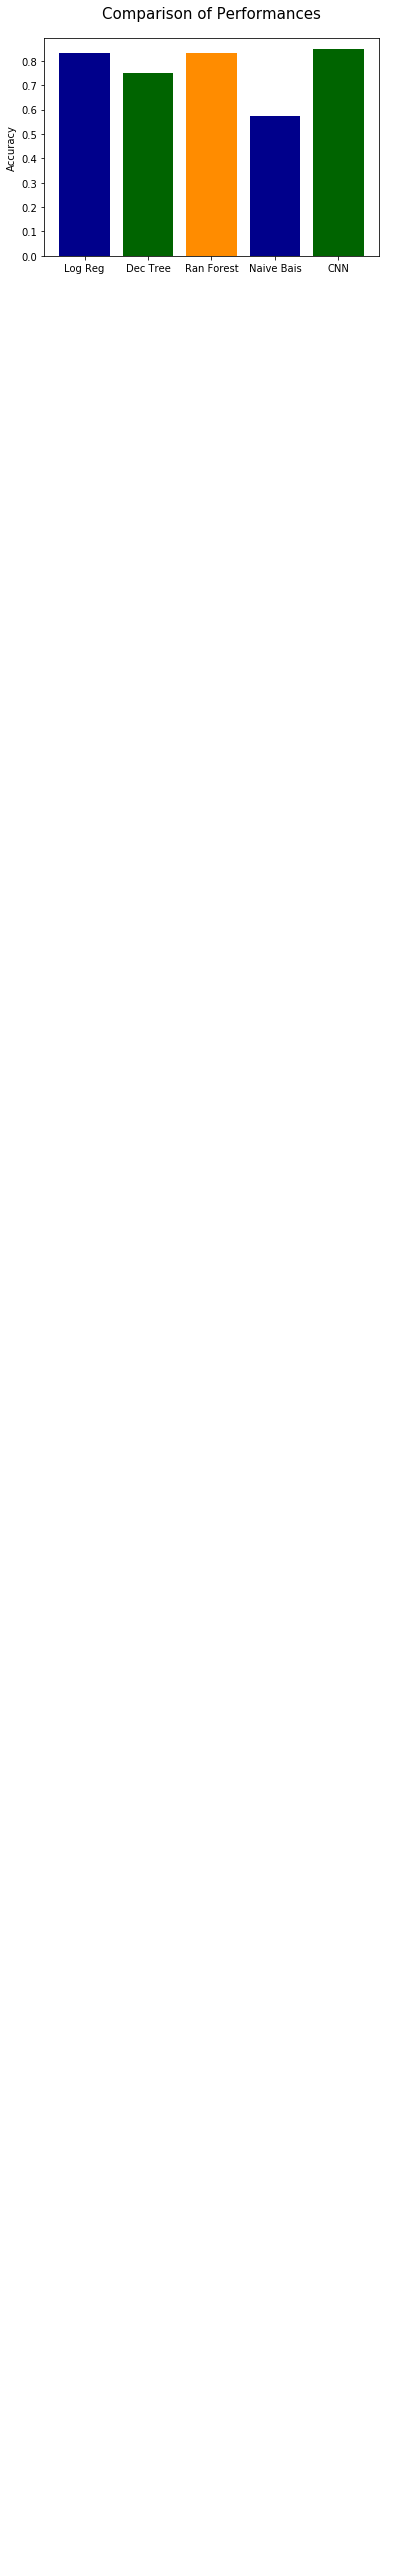

In [24]:
#### Plot the Score of each model
plt.bar(np.arange(len(scores_df)), accuracy_list, align='center', color=["darkblue", "darkgreen", "darkorange"])
plt.xticks(np.arange(len(scores_df)), scores_df.index)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Comparison of Performances', fontsize=15, pad=20)
for i, v in enumerate(accuracy_list):
    plt.text(i, v-10, scores_df["Accuracy"][i], color='white', fontweight='bold', fontsize=10,
             horizontalalignment='center', verticalalignment='center')

plt.show()